# Preprocessing Bank Marketing dataset

In [1]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split

filename = r"E:\Documents\University of Hildesheim\Machine learning lab\lab5\bank.csv"
bank = pd.read_csv(filename,delimiter=';')

In [2]:
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


### Removing all NA values from the dataset

In [4]:
bank.dropna(inplace=True)

### Converting non-numeric values to numeric values using categorical encoding 

In [5]:
col=['job','marital','education','default','housing','loan','month','contact','duration','poutcome','y']
bank[col] = bank[col].astype('category')

What can be experimented with is a simple categorical encoding, wherein each unique entry is assigned it's own number. Pandas does with relative ease by assigning desired object columns to a category dtype

In [6]:
bank.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration     category
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

### Encoding the category column with unique values

In [7]:
bank_enc = bank.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

It is shown that each categorical values has its unique values

In [8]:
bank_enc.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,75,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,216,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,181,1,330,1,0,0


### Splitting the data into train (0.8) and test (0.2) set 

In [381]:
Ydata_bank = bank_enc['y'] 
Xdata_bank = bank_enc.loc[:,bank_enc.columns!='y']
Xdata_bank = (Xdata_bank - Xdata_bank.mean())/Xdata_bank.std() #data normalized

x_train_bank, x_test_bank, y_train_bank, y_test_bank =train_test_split(Xdata_bank, 
                                                                       Ydata_bank,train_size=0.8, 
                                                                       test_size=0.2, 
                                                                       random_state=0)

In [383]:
y_train_bank=y_train_bank.values.reshape(-1,1)
y_test_bank=y_test_bank.values.reshape(-1,1)
x_train_bank=x_train_bank.values
x_test_bank=x_test_bank.values

# Preprocessing wine quality-red data

In [221]:
filename=r"E:\Documents\University of Hildesheim\Machine learning lab\lab5\winequality-red.csv"
rwine_data = pd.read_csv(filename,delimiter=';')
rwine_data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


The data has no numeric values

In [222]:
rwine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [255]:
Xdata_rwine = rwine_data.loc[:,rwine_data.columns!='quality']
Ydata_rwine = rwine_data[['quality']]
Xdata_rwine = (Xdata_rwine - Xdata_rwine.mean())/Xdata_rwine.std() #data normalized
x_train_rwine, x_test_rwine, y_train_rwine, y_test_rwine =train_test_split(Xdata_rwine, 
                                                                       Ydata_rwine,train_size=0.8, 
                                                                       test_size=0.2, 
                                                                       random_state=0)

In [256]:
y_train_rwine=y_train_rwine.values.reshape(-1,1)
y_test_rwine=y_test_rwine.values.reshape(-1,1)
x_train_rwine=x_train_rwine.values
x_test_rwine=x_test_rwine.values

# Preprocessing wine quality white data

In [257]:
filename=r"E:\Documents\University of Hildesheim\Machine learning lab\lab5\winequality-white.csv"
wwine_data = pd.read_csv(filename,delimiter=';')
wwine_data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [259]:

Xdata_wwine = wwine_data.loc[:,wwine_data.columns!='quality']
Ydata_wwine = wwine_data['quality']
Xdata_wwine = (Xdata_wwine - Xdata_wwine.mean())/Xdata_wwine.std() #data normalized

x_train_wwine, x_test_wwine, y_train_wwine, y_test_wwine =train_test_split(Xdata_wwine, 
                                                                       Ydata_wwine,train_size=0.8, 
                                                                       test_size=0.2, 
                                                                       random_state=0)

In [260]:
y_train_wwine=y_train_wwine.values.reshape(-1,1)
y_test_wwine=y_test_wwine.values.reshape(-1,1)
x_train_wwine=x_train_wwine.values
x_test_wwine=x_test_wwine.values

# Ridge Regression using mini-Batch Gradient Descent

In [360]:
def logistic_function(X, beta):
    z = np.dot(X,beta)
    return 1 / (1 + np.exp(-z))

def log_likelihood(x, y, beta):
    z = np.dot(x, beta)
    log = np.sum( y*z - np.log(1 + np.exp(z)) )
    return log

betas = lambda x,y,beta,alpha,lamda : beta-alpha*(-2*np.dot(x.T,y-logistic_function(x, beta))+(2*lamda)*beta)
rmse  = lambda y,ypred: np.sqrt(np.mean((y-ypred)**2))
cost  = lambda y,ypred: np.mean((y - ypred)**2)

In [424]:
def stochastic_gradient_descent(x_train,y_train,alpha,epochs,lamda,x_test,y_test):
    m_train,n_features = np.shape(x_train)
    ini_alpha          = alpha
    beta_hat           = np.random.random(n_features).reshape(-1,1)
    rmsetrain          = []
    rmsetest           = []
    relative_loss      = []
    y_hat              = logistic_function(x_train,beta_hat)
    
    chunk_size = 50
    for i in range(epochs):
        loss_old  = cost(y_train,y_hat)
        for chunk in range(len(x_train)//chunk_size):
            x_chunk  = x_train[chunk*chunk_size:min((chunk+1)*chunk_size,len(x_train))]
            y_chunk  = y_train[chunk*chunk_size:min((chunk+1)*chunk_size,len(y_train))]
            
            beta_hat = betas(x_chunk,y_chunk,beta_hat,alpha,lamda)
        
        y_hat=logistic_function(x_train,beta_hat)
        loss_new  = cost(y_train,y_hat)
        
        rmsetest.append(rmse(y_test,logistic_function(x_test,beta_hat)))
        rmsetrain.append(rmse(y_train,logistic_function(x_train,beta_hat)))
        relative_loss.append(np.abs(loss_new-loss_old))
        
        if i % 10 == 0:
            print(f"epochs: {i} loss: {np.abs(loss_new-loss_old)} rmse test: {rmse(y_test,logistic_function(x_test,beta_hat))} rmse train: {rmse(y_train,logistic_function(x_train,beta_hat))} learn rate:{alpha} lamda:{lamda}")
        if (np.abs(loss_new-loss_old))==0:
            break
    
    plt.plot(np.arange(len(rmsetrain)),rmsetrain,'g',label='rmse_train')
    plt.plot(np.arange(len(rmsetest)),rmsetest,'r',label='rmse_test')
    plt.xlabel("epochs")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()
    
    
    plt.xlabel("epochs")
    plt.ylabel("RMSE")
    rmsetest=[x*-1 for x in rmsetest]
    plt.plot(np.arange(len(rmsetest)),rmsetest,'r',label='rmse_neg_test')
    plt.plot(np.arange(len(rmsetrain)),rmsetrain,'g',label='rmse_train')
    plt.legend()
    plt.show()
    
    return rmsetest,rmsetrain
    

# Ridge Regression using mini-Batch Gradient Descent using the Bank Marketing dataset

Training the bank marketing data and plotting the rmse values for three combinations of alpha and lamda values

### The first two combinations of Alpha(lr) and lamda displayed an optimal result where we can see the rmsetrain and rmsetest is almost similar

epochs: 0 loss: 0.002435144116213539 rmse test: 0.5667694855064026 rmse train: 0.5744277247782226 learn rate:1e-05
epochs: 10 loss: 0.0021534049591030446 rmse test: 0.5482614339415794 rmse train: 0.554143593611822 learn rate:1e-05
epochs: 20 loss: 0.0017952841283244703 rmse test: 0.5322709618257061 rmse train: 0.5361673983471478 learn rate:1e-05
epochs: 30 loss: 0.001424949376957807 rmse test: 0.5192094851284748 rmse train: 0.5211261056839336 learn rate:1e-05
epochs: 40 loss: 0.0010891781951399282 rmse test: 0.5089938579837207 rmse train: 0.5091275931104544 learn rate:1e-05
epochs: 50 loss: 0.0008103640532673151 rmse test: 0.5012424039715562 rmse train: 0.4999032519088517 learn rate:1e-05
epochs: 60 loss: 0.0005921559693751466 rmse test: 0.49547212966386023 rmse train: 0.4929990062612847 learn rate:1e-05
epochs: 70 loss: 0.00042799343608007634 rmse test: 0.4912255722423666 rmse train: 0.48792407895803136 learn rate:1e-05
epochs: 80 loss: 0.00030760787731193284 rmse test: 0.488122691502

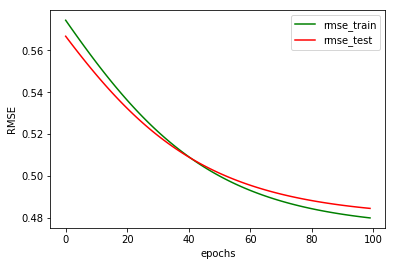

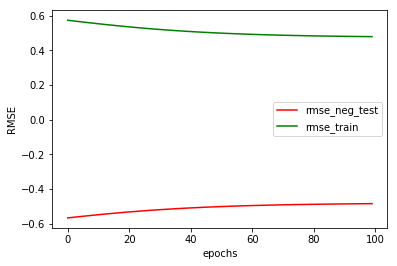

In [363]:
lr=0.00001
epochs=100
lamda=0.0000001

sgd=stochastic_gradient_descent(x_train_bank,y_train_bank,lr,epochs,lamda,x_test_bank,y_test_bank)

epochs: 0 loss: 0.023062767341360757 rmse test: 0.5645457503672167 rmse train: 0.5701477569122377 learn rate:0.0001
epochs: 10 loss: 0.0022491519594182163 rmse test: 0.48635301418782906 rmse train: 0.4801129046089979 learn rate:0.0001
epochs: 20 loss: 3.964943702564061e-05 rmse test: 0.48015353694355234 rmse train: 0.47392412457663413 learn rate:0.0001
epochs: 30 loss: 4.1128671128543015e-05 rmse test: 0.47993772930217266 rmse train: 0.47428256266027247 learn rate:0.0001
epochs: 40 loss: 1.3254800108997156e-05 rmse test: 0.479938100019452 rmse train: 0.4745456489104172 learn rate:0.0001
epochs: 50 loss: 1.1459817071124423e-06 rmse test: 0.47994427857585537 rmse train: 0.47460246105958503 learn rate:0.0001
epochs: 60 loss: 1.5320859126088937e-06 rmse test: 0.479926290377631 rmse train: 0.47459464507117455 learn rate:0.0001
epochs: 70 loss: 1.3923905377577483e-06 rmse test: 0.47989119878711056 rmse train: 0.4745782750910743 learn rate:0.0001
epochs: 80 loss: 7.001488884217366e-07 rmse te

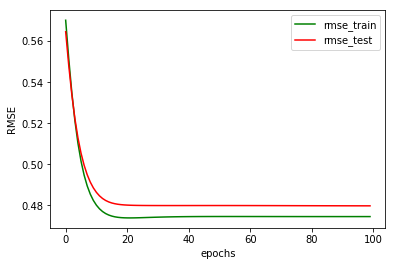

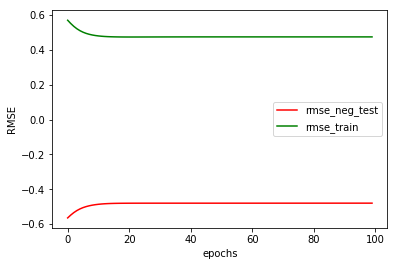

In [339]:
lr=0.0001
epochs=100
lamda=0.1

sgd=stochastic_gradient_descent(x_train_bank,y_train_bank,lr,epochs,lamda,x_test_bank,y_test_bank)

### This combination of alpha(lr) and lamda was not optimal because the rmse of test train has a significant difference the reason behind can be the higher values of alpha(lr)

epochs: 0 loss: 0.1012987002452139 rmse test: 0.4915859610745922 rmse train: 0.4833867419875229 learn rate:0.001
epochs: 10 loss: 1.8763479428723917e-05 rmse test: 0.47977268389697897 rmse train: 0.4748526179285648 learn rate:0.001
epochs: 20 loss: 1.2782270281952446e-06 rmse test: 0.4797878666761989 rmse train: 0.4749162403972483 learn rate:0.001
epochs: 30 loss: 6.889696593792571e-08 rmse test: 0.47978910634522515 rmse train: 0.4749200053641214 learn rate:0.001
epochs: 40 loss: 3.670668158317625e-09 rmse test: 0.4797891735787845 rmse train: 0.47492020692878656 learn rate:0.001
epochs: 50 loss: 1.9544399432191994e-10 rmse test: 0.47978917716199065 rmse train: 0.4749202176638266 learn rate:0.001
epochs: 60 loss: 1.0406037143084745e-11 rmse test: 0.47978917735278104 rmse train: 0.4749202182354006 learn rate:0.001
epochs: 70 loss: 5.540845560148e-13 rmse test: 0.47978917736293925 rmse train: 0.4749202182658329 learn rate:0.001
epochs: 80 loss: 2.9531932455029164e-14 rmse test: 0.47978917

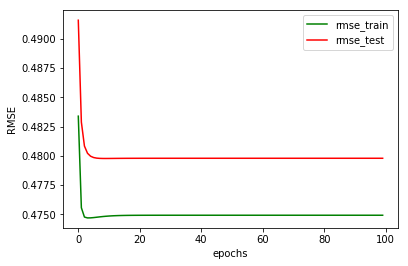

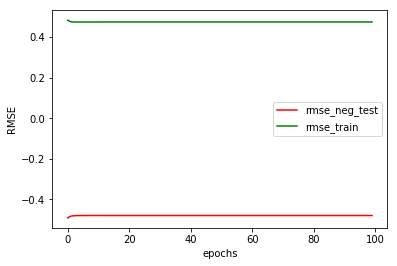

In [340]:
lr=0.001
epochs=100
lamda=0.5

sgd=stochastic_gradient_descent(x_train_bank,y_train_bank,lr,epochs,lamda,x_test_bank,y_test_bank)

# Ridge Regression using mini-Batch Gradient Descent using the Wine quality RED dataset

Training the wine quality red data and plotting the rmse values for three combinations of alpha and lamda values

### For this combination of parameters the rmse decreased in both case but the model is not optimal for those parameter the reason behind it can the very low value of lamda

epochs: 0 loss: 0.0006509246559716075 rmse test: 5.189771015241054 rmse train: 5.243582645791314 learn rate:1e-06 lamda:1e-08
epochs: 10 loss: 0.0006435340938999445 rmse test: 5.189262549077594 rmse train: 5.24296577704215 learn rate:1e-06 lamda:1e-08
epochs: 20 loss: 0.000635878402380996 rmse test: 5.18875683651541 rmse train: 5.242356024981522 learn rate:1e-06 lamda:1e-08
epochs: 30 loss: 0.0006279739874806012 rmse test: 5.188253941090884 rmse train: 5.241753636374407 learn rate:1e-06 lamda:1e-08
epochs: 40 loss: 0.0006198370758241367 rmse test: 5.187753925569301 rmse train: 5.2411588425094555 learn rate:1e-06 lamda:1e-08
epochs: 50 loss: 0.0006114836860078299 rmse test: 5.187256852478571 rmse train: 5.240571859373253 learn rate:1e-06 lamda:1e-08
epochs: 60 loss: 0.0006029296030050091 rmse test: 5.186762784580742 rmse train: 5.2399928878506445 learn rate:1e-06 lamda:1e-08
epochs: 70 loss: 0.000594190355471369 rmse test: 5.1862717852802245 rmse train: 5.23942211394833 learn rate:1e-06

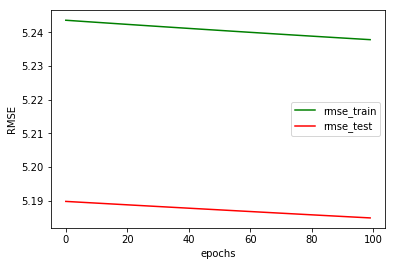

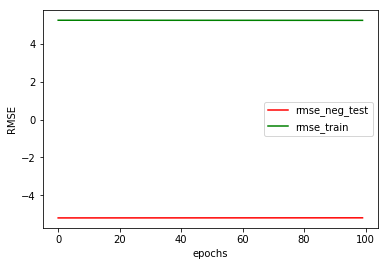

In [467]:
lr=0.000001
epochs=100
lamda=0.00000001

sgd=stochastic_gradient_descent(x_train_rwine,y_train_rwine,lr,epochs,lamda,x_test_rwine,y_test_rwine)

### As the lamda values increased as well as the learning rate we can notice that the model is better than the previous one

epochs: 0 loss: 0.0041321762277775065 rmse test: 5.197836846833961 rmse train: 5.251086239601267 learn rate:1e-05
epochs: 10 loss: 0.005069688427788321 rmse test: 5.194623807314949 rmse train: 5.246624627379558 learn rate:1e-05
epochs: 20 loss: 0.005516118285370908 rmse test: 5.19053899222862 rmse train: 5.241515530311854 learn rate:1e-05
epochs: 30 loss: 0.005458645723205535 rmse test: 5.1860538835666325 rmse train: 5.236244244282735 learn rate:1e-05
epochs: 40 loss: 0.004998994322473749 rmse test: 5.181584353750308 rmse train: 5.231244938115033 learn rate:1e-05
epochs: 50 loss: 0.004290628823522269 rmse test: 5.177419404769383 rmse train: 5.226824129034064 learn rate:1e-05
epochs: 60 loss: 0.0034836579159964742 rmse test: 5.173729198881787 rmse train: 5.223140271391289 learn rate:1e-05
epochs: 70 loss: 0.0026887364330399066 rmse test: 5.170596755200449 rmse train: 5.220227227788137 learn rate:1e-05
epochs: 80 loss: 0.0019678706421792924 rmse test: 5.168047043758433 rmse train: 5.2180

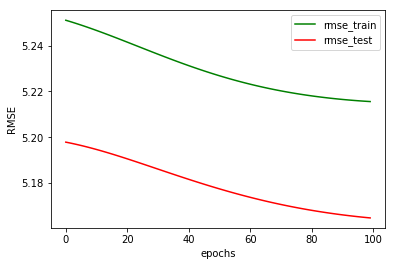

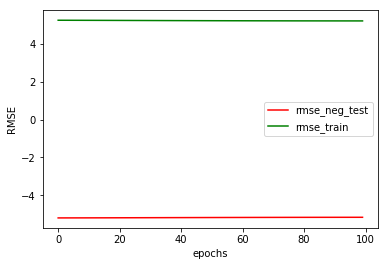

In [342]:
lr=0.00001
epochs=100
lamda=0.001

sgd=stochastic_gradient_descent(x_train_rwine,y_train_rwine,lr,epochs,lamda,x_test_rwine,y_test_rwine)

### As the learning rate is too high that why the rmse values increased

epochs: 0 loss: 0.10771665167445477 rmse test: 5.164264008947285 rmse train: 5.212475398776306 learn rate:0.001
epochs: 10 loss: 0.005909533382872922 rmse test: 5.182808901152875 rmse train: 5.246659422475059 learn rate:0.001
epochs: 20 loss: 0.0009578484993255643 rmse test: 5.183234548612397 rmse train: 5.248788510066779 learn rate:0.001
epochs: 30 loss: 0.0003445648024111847 rmse test: 5.183103146181624 rmse train: 5.249312919481072 learn rate:0.001
epochs: 40 loss: 0.00014532184482973776 rmse test: 5.183001372876649 rmse train: 5.249523234859014 learn rate:0.001
epochs: 50 loss: 5.8955354269585314e-05 rmse test: 5.182927705884194 rmse train: 5.2496109358269685 learn rate:0.001
epochs: 60 loss: 2.0754388341259755e-05 rmse test: 5.182872071018055 rmse train: 5.2496446441304085 learn rate:0.001
epochs: 70 loss: 4.09833970493878e-06 rmse test: 5.182828660014807 rmse train: 5.24965459002484 learn rate:0.001
epochs: 80 loss: 2.8008884029873116e-06 rmse test: 5.182794184899615 rmse train: 

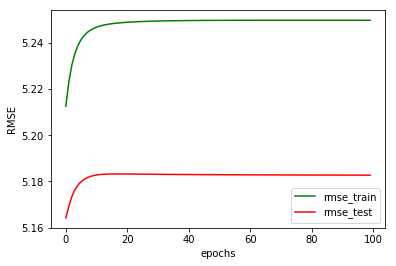

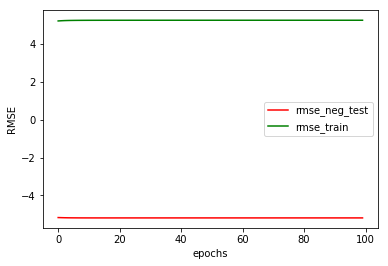

In [343]:
lr=0.001
epochs=100
lamda=0.5

sgd=stochastic_gradient_descent(x_train_rwine,y_train_rwine,lr,epochs,lamda,x_test_rwine,y_test_rwine)

# Ridge Regression using mini-Batch Gradient Descent using the Wine quality WHITE dataset

Training the wine quality white data and plotting the rmse values for three combinations of alpha and lamda values

### The first two combinations of Alpha(lr) and lamda displayed decreasing rmse but the model is not optimal as there is a gap between rmse train and rmse test

epochs: 0 loss: 0.03280442703835362 rmse test: 5.437965844930234 rmse train: 5.497458231222561 learn rate:1e-05
epochs: 10 loss: 0.021652877313009355 rmse test: 5.4133057526177035 rmse train: 5.471538162042627 learn rate:1e-05
epochs: 20 loss: 0.005101611126974603 rmse test: 5.403431619368905 rmse train: 5.460716203387002 learn rate:1e-05
epochs: 30 loss: 0.0002758226316856849 rmse test: 5.402254597120471 rmse train: 5.459448814439359 learn rate:1e-05
epochs: 40 loss: 0.0006306304975609578 rmse test: 5.4026970433745225 rmse train: 5.4600280104496255 learn rate:1e-05
epochs: 50 loss: 9.064401385572296e-05 rmse test: 5.403020498746178 rmse train: 5.4603460765052265 learn rate:1e-05
epochs: 60 loss: 0.0003882261440431023 rmse test: 5.403159204455013 rmse train: 5.460173099310704 learn rate:1e-05
epochs: 70 loss: 0.0006709203601715785 rmse test: 5.403104985917543 rmse train: 5.459661702361775 learn rate:1e-05
epochs: 80 loss: 0.0008078085709080085 rmse test: 5.402652109212518 rmse train: 5

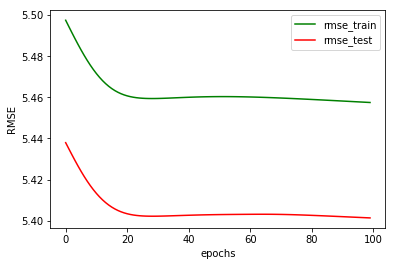

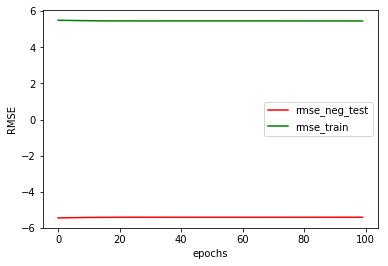

In [344]:
lr=0.00001
epochs=100
lamda=0.00000001

sgd=stochastic_gradient_descent(x_train_wwine,y_train_wwine,lr,epochs,lamda,x_test_wwine,y_test_wwine)

epochs: 0 loss: 0.02750199731630687 rmse test: 5.434855572836458 rmse train: 5.495391962871424 learn rate:1e-05
epochs: 10 loss: 0.022515041212358256 rmse test: 5.412345873793623 rmse train: 5.471305892434331 learn rate:1e-05
epochs: 20 loss: 0.009306422585112273 rmse test: 5.39918958422557 rmse train: 5.457741524709962 learn rate:1e-05
epochs: 30 loss: 0.003146960744768279 rmse test: 5.39508591012017 rmse train: 5.452792374176082 learn rate:1e-05
epochs: 40 loss: 0.0012215630958323231 rmse test: 5.394387763837499 rmse train: 5.451057384130869 learn rate:1e-05
epochs: 50 loss: 0.0006637598153744761 rmse test: 5.393873827178325 rmse train: 5.450266208262205 learn rate:1e-05
epochs: 60 loss: 0.000470282918687559 rmse test: 5.393437213897484 rmse train: 5.449768328901487 learn rate:1e-05
epochs: 70 loss: 0.0003865714110098395 rmse test: 5.393098538824459 rmse train: 5.449383696932788 learn rate:1e-05
epochs: 80 loss: 0.0003430798249439704 rmse test: 5.3928404250082425 rmse train: 5.449052

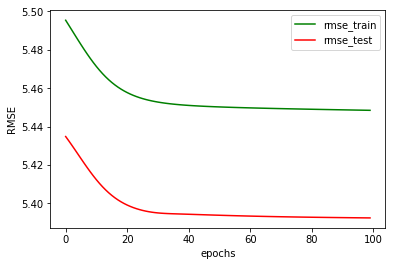

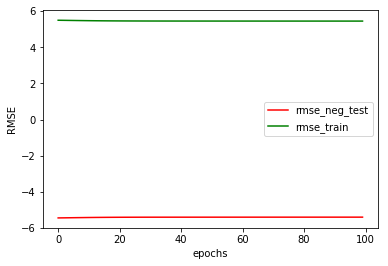

In [345]:
lr=0.00001
epochs=100
lamda=0.001

sgd=stochastic_gradient_descent(x_train_wwine,y_train_wwine,lr,epochs,lamda,x_test_wwine,y_test_wwine)

### Due to high value of lamda the model is not optimal

epochs: 0 loss: 0.3069763558754879 rmse test: 5.399939207664042 rmse train: 5.4548055310251335 learn rate:0.001
epochs: 10 loss: 0.0008315851709141953 rmse test: 5.390327987293128 rmse train: 5.444733866663246 learn rate:0.001
epochs: 20 loss: 6.631570777670959e-05 rmse test: 5.390194768977441 rmse train: 5.444497304705175 learn rate:0.001
epochs: 30 loss: 2.297646947369003e-06 rmse test: 5.390203344655504 rmse train: 5.444479171068812 learn rate:0.001
epochs: 40 loss: 2.429880638032955e-06 rmse test: 5.390214647830223 rmse train: 5.4444805414223 learn rate:0.001
epochs: 50 loss: 1.468457579534288e-06 rmse test: 5.3902206477713674 rmse train: 5.444482337755284 learn rate:0.001
epochs: 60 loss: 6.483208210283919e-07 rmse test: 5.390223399707522 rmse train: 5.444483233511125 learn rate:0.001
epochs: 70 loss: 2.5839322148613064e-07 rmse test: 5.390224603054633 rmse train: 5.444483607285957 learn rate:0.001
epochs: 80 loss: 9.78192780110021e-08 rmse test: 5.3902251195811255 rmse train: 5.4

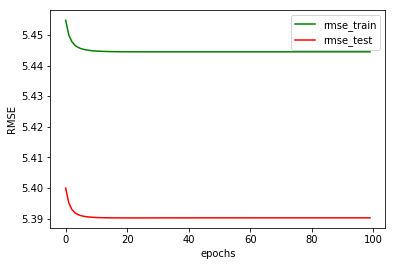

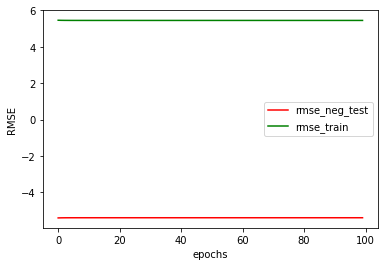

In [302]:
lr=0.001
epochs=100
lamda=0.5

sgd=stochastic_gradient_descent(x_train_wwine,y_train_wwine,lr,epochs,lamda,x_test_wwine,y_test_wwine)